<h1> K Nearest Neighbours </h1>

## Table of Contents

1. [Phishing Site Detection](#dd)
2. [Importing the packages and dataset](#import)
3. [Splitting the data into Training and Test Set](#split)
4. [Building the KNN model](#build)
5. [Predictions from KNN model](#predict)
6. [Evaluating the model](#eval)
7. [Appendix](#appendix)

### 1. Phishing Site Detection  <a id='dd'>

In this dataset, we have collected the information about different websites inorder to classify them as phishing or legitimate websites.

** Column Description **

 	having_IP_Address's type is nominal, range is ('-1', '1')
 	URL_Length's type is nominal, range is ('1', '0', '-1')
 	Shortining_Service's type is nominal, range is ('1', '-1')
 	having_At_Symbol's type is nominal, range is ('1', '-1')
 	double_slash_redirecting's type is nominal, range is ('-1', '1')
 	Prefix_Suffix's type is nominal, range is ('-1', '1')
 	having_Sub_Domain's type is nominal, range is ('-1', '0', '1')
 	SSLfinal_State's type is nominal, range is ('-1', '1', '0')
 	Domain_registeration_length's type is nominal, range is ('-1', '1')
 	Favicon's type is nominal, range is ('1', '-1')
 	port's type is nominal, range is ('1', '-1')
 	HTTPS_token's type is nominal, range is ('-1', '1')
 	Request_URL's type is nominal, range is ('1', '-1')
 	URL_of_Anchor's type is nominal, range is ('-1', '0', '1')
 	Links_in_tags's type is nominal, range is ('1', '-1', '0')
 	SFH's type is nominal, range is ('-1', '1', '0')
 	Submitting_to_email's type is nominal, range is ('-1', '1')
 	Abnormal_URL's type is nominal, range is ('-1', '1')
 	Redirect's type is nominal, range is ('0', '1')
 	on_mouseover's type is nominal, range is ('1', '-1')
 	RightClick's type is nominal, range is ('1', '-1')
 	popUpWidnow's type is nominal, range is ('1', '-1')
 	Iframe's type is nominal, range is ('1', '-1')
 	age_of_domain's type is nominal, range is ('-1', '1')
 	DNSRecord's type is nominal, range is ('-1', '1')
 	web_traffic's type is nominal, range is ('-1', '0', '1')
 	Page_Rank's type is nominal, range is ('-1', '1')
 	Google_Index's type is nominal, range is ('1', '-1')
 	Links_pointing_to_page's type is nominal, range is ('1', '0', '-1')
 	Statistical_report's type is nominal, range is ('-1', '1')
 	Result's type is nominal, range is ('-1', '1'))
    
    The  data coding is as follows:
    "1"  - Legitimate Website
    "0"  - Suspisious
    "-1" - Malicious Website
    
** Objective**

To predict the value of Result column and say whether the website is Malicious or Legitimate website.

### 2. Importing the packages and dataset  <a id='import'>

In [2]:
# Importing the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading data from arff files
from scipy.io.arff import loadarff

C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  re

In [8]:
# Loading the data

phishing_data_raw = loadarff(r"C:\Users\hp\Desktop\Path to Data Science\UpX\Machine Learning\KNN\attachment_PhishingData_lyst1534.arff")

In [9]:
phishing_data_raw

(array([(b'-1', b'1', b'1', b'1', b'-1', b'-1', b'-1', b'-1', b'-1', b'1', b'1', b'-1', b'1', b'-1', b'1', b'-1', b'-1', b'-1', b'0', b'1', b'1', b'1', b'1', b'-1', b'-1', b'-1', b'-1', b'1', b'1', b'-1', b'-1'),
        (b'1', b'1', b'1', b'1', b'1', b'-1', b'0', b'1', b'-1', b'1', b'1', b'-1', b'1', b'0', b'-1', b'-1', b'1', b'1', b'0', b'1', b'1', b'1', b'1', b'-1', b'-1', b'0', b'-1', b'1', b'1', b'1', b'-1'),
        (b'1', b'0', b'1', b'1', b'1', b'-1', b'-1', b'-1', b'-1', b'1', b'1', b'-1', b'1', b'0', b'-1', b'-1', b'-1', b'-1', b'0', b'1', b'1', b'1', b'1', b'1', b'-1', b'1', b'-1', b'1', b'0', b'-1', b'-1'),
        ...,
        (b'1', b'-1', b'1', b'1', b'1', b'-1', b'1', b'-1', b'-1', b'1', b'1', b'1', b'1', b'0', b'-1', b'-1', b'1', b'1', b'0', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'-1', b'1', b'0', b'1', b'-1'),
        (b'-1', b'-1', b'1', b'1', b'1', b'-1', b'-1', b'-1', b'1', b'-1', b'1', b'1', b'-1', b'-1', b'1', b'-1', b'1', b'1', b'0', b'-1', b'1', b'-1', b'1'

In [10]:
# Selection of the Data and converting data into numpy format for flexibility in cleaning
phising_data_array = np.array(phishing_data_raw[0])
phising_data_array

array([(b'-1', b'1', b'1', b'1', b'-1', b'-1', b'-1', b'-1', b'-1', b'1', b'1', b'-1', b'1', b'-1', b'1', b'-1', b'-1', b'-1', b'0', b'1', b'1', b'1', b'1', b'-1', b'-1', b'-1', b'-1', b'1', b'1', b'-1', b'-1'),
       (b'1', b'1', b'1', b'1', b'1', b'-1', b'0', b'1', b'-1', b'1', b'1', b'-1', b'1', b'0', b'-1', b'-1', b'1', b'1', b'0', b'1', b'1', b'1', b'1', b'-1', b'-1', b'0', b'-1', b'1', b'1', b'1', b'-1'),
       (b'1', b'0', b'1', b'1', b'1', b'-1', b'-1', b'-1', b'-1', b'1', b'1', b'-1', b'1', b'0', b'-1', b'-1', b'-1', b'-1', b'0', b'1', b'1', b'1', b'1', b'1', b'-1', b'1', b'-1', b'1', b'0', b'-1', b'-1'),
       ...,
       (b'1', b'-1', b'1', b'1', b'1', b'-1', b'1', b'-1', b'-1', b'1', b'1', b'1', b'1', b'0', b'-1', b'-1', b'1', b'1', b'0', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'-1', b'1', b'0', b'1', b'-1'),
       (b'-1', b'-1', b'1', b'1', b'1', b'-1', b'-1', b'-1', b'1', b'-1', b'1', b'1', b'-1', b'-1', b'1', b'-1', b'1', b'1', b'0', b'-1', b'1', b'-1', b'1', b'1'

In [11]:
# Converting the numpy array into Pandas data frame  and casting the columns to numeric type
phising_data_frame = pd.DataFrame(phising_data_array).apply(pd.to_numeric)
phising_data_frame[0:10]

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


In [12]:
# Column Names

phising_data_frame.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [13]:
# Extracting the labels

labels = phising_data_frame["Result"].values
print(labels)

[-1 -1 -1 ... -1 -1 -1]


In [14]:
phising_data_frame["Result"].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

There are 6157 legitimate websites and 4898 Malicious websites

**Performing basic EDA**

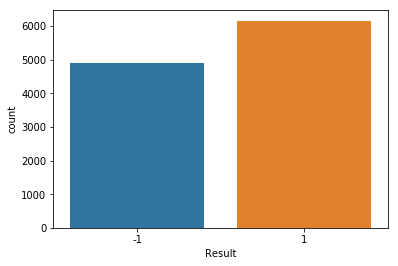

In [15]:
sns.countplot('Result', data = phising_data_frame)

From above plot we can see that there are 6157 legitimate websites and 4898 Malicious websites

In [16]:
# Extracting the features

print(phising_data_frame.columns[:-1])
features = phising_data_frame.columns[:-1]
predictors = phising_data_frame[features].values
predictors

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')


array([[-1,  1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  0,  1, ...,  1,  0, -1],
       ...,
       [ 1, -1,  1, ...,  1,  0,  1],
       [-1, -1,  1, ...,  1,  1,  1],
       [-1, -1,  1, ..., -1,  1, -1]], dtype=int64)

In [17]:
corr = phising_data_frame.corr()
corr.round(2)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IP_Address,1.00,-0.05,0.40,0.16,0.40,-0.01,-0.08,0.07,-0.02,0.09,...,0.10,0.05,-0.01,-0.05,0.00,-0.09,0.03,-0.34,-0.02,0.09
URL_Length,-0.05,1.00,-0.10,-0.08,-0.08,0.06,0.00,0.05,-0.22,-0.04,...,-0.05,-0.01,0.18,-0.04,0.01,0.18,0.00,-0.02,-0.07,0.06
Shortining_Service,0.40,-0.10,1.00,0.10,0.84,-0.08,-0.04,-0.06,0.06,0.01,...,0.04,0.02,-0.05,0.44,-0.05,0.01,0.16,-0.20,0.09,-0.07
having_At_Symbol,0.16,-0.08,0.10,1.00,0.09,-0.01,-0.06,0.03,0.02,0.30,...,0.29,0.28,-0.01,-0.05,0.03,-0.06,0.04,-0.01,-0.08,0.05
double_slash_redirecting,0.40,-0.08,0.84,0.09,1.00,-0.09,-0.04,-0.04,0.05,0.04,...,0.05,0.01,-0.05,0.43,-0.06,-0.00,0.18,-0.19,0.07,-0.04
Prefix_Suffix,-0.01,0.06,-0.08,-0.01,-0.09,1.00,0.09,0.26,-0.10,-0.01,...,-0.01,-0.04,0.07,-0.02,0.11,-0.01,0.07,0.07,-0.00,0.35
having_Sub_Domain,-0.08,0.00,-0.04,-0.06,-0.04,0.09,1.00,0.27,-0.08,-0.02,...,-0.03,0.01,0.12,0.13,-0.01,0.12,0.06,-0.01,0.08,0.30
SSLfinal_State,0.07,0.05,-0.06,0.03,-0.04,0.26,0.27,1.00,-0.19,-0.01,...,-0.01,-0.00,0.16,0.05,0.26,0.07,0.10,-0.01,0.06,0.71
Domain_registeration_length,-0.02,-0.22,0.06,0.02,0.05,-0.10,-0.08,-0.19,1.00,0.05,...,0.05,0.00,-0.06,-0.01,-0.13,-0.06,-0.04,0.12,-0.00,-0.23
Favicon,0.09,-0.04,0.01,0.30,0.04,-0.01,-0.02,-0.01,0.05,1.00,...,0.94,0.63,-0.00,0.09,-0.05,0.01,-0.02,-0.13,0.30,-0.00


There is some correlation between double_slash_redirecting and shortining_service.  <br>
There are some correlation between some values. But they won't be much useful as most of the features are categorical.

Since a lot of variables are categorical we havent performed any EDA on this.

### 3. Splitting the data into Training and Test Set   <a id='split'>

In [18]:
X = predictors
y = labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### 4.Building the KNN model    <a id='predict'>
    

In [19]:
# Fitting the KNN Classifier on Training data
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_knn = clf_knn.fit(X_train,y_train)

### 5. Prediction from KNN model    <a id='predict'>

In [20]:
y_pred = clf_knn.predict(X_test)

### 6. Evaluating the model   <a id='eval'>

**Cross Validation** is used to see how well a model performs in an independent dataset. Different samples are used for training and testing and the average accuracy score is calculated.

In [22]:
# Computing the Cross validation score with 5-fold cross validation

from sklearn.model_selection import cross_val_score
score_knn = cross_val_score(clf_knn, X_test, y_test, cv=5)
print("Cross Validation score : " + str(score_knn))
print("Cross Validation Mean score : " + str(score_knn.mean()))

Cross Validation score : [0.92418773 0.91500904 0.89330922 0.91666667 0.89673913]
Cross Validation Mean score : 0.909182357349537


**Classification Report**

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

          -1       0.91      0.93      0.92      1183
           1       0.95      0.93      0.94      1581

   micro avg       0.93      0.93      0.93      2764
   macro avg       0.93      0.93      0.93      2764
weighted avg       0.93      0.93      0.93      2764



**Confusion Matrix**

In [24]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1102   81]
 [ 113 1468]]


**Accuracy**

In [25]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9298118668596237

### 7. Appendix   <a id='appendix'>
1. Use different counts of neighbours by setting value of k (5,7,9,11,13,15,17) <br/>
2. Perform CV(5) on each value of <b>k (k in kNN)</b> <br/>
3. Compare the <b>CV Score</b> to deduce the best model <br/>
4. Use the best value of k <br/>

In [27]:
list_k = [5,7,9,11,13,15,17]

for k in list_k:
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    score_knn = cross_val_score(clf_knn, X_test, y_test, cv=5)
    print("K: ", k)
    print("Cross Validation score : " + str(score_knn))
    print("Cross Validation Mean score : " + str(score_knn.mean()))
    print("")

K:  5
Cross Validation score : [0.92418773 0.91139241 0.90235081 0.9076087  0.91666667]
Cross Validation Mean score : 0.912441261351424

K:  7
Cross Validation score : [0.92057762 0.91862568 0.9005425  0.93115942 0.90217391]
Cross Validation Mean score : 0.9146158248520813

K:  9
Cross Validation score : [0.92238267 0.920434   0.90777577 0.92028986 0.90398551]
Cross Validation Mean score : 0.9149735597435221

K:  11
Cross Validation score : [0.92599278 0.92224231 0.90596745 0.92210145 0.9057971 ]
Cross Validation Mean score : 0.9164202190853313

K:  13
Cross Validation score : [0.91155235 0.92224231 0.90415913 0.91485507 0.90217391]
Cross Validation Mean score : 0.9109965557464509

K:  15
Cross Validation score : [0.9133574  0.92766727 0.90958409 0.91666667 0.89855072]
Cross Validation Mean score : 0.9131652296530135

K:  17
Cross Validation score : [0.91516245 0.92405063 0.89692586 0.90942029 0.89130435]
Cross Validation Mean score : 0.9073727168834747



Using the value of k=11, we have obtained the highest cross-validation accuracy of 0.916

**The End**